In [1]:
import numpy as np
import pandas as pd
#from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [2]:
df = pd.read_csv("train.csv")
df
base_path = './images/'

In [3]:
samples = 500000
df=df.loc[df['id'].str.startswith('00',na=False),:]
classes= len(df['landmark_id'].unique())
count = len(df)
print(classes)
print(count)
df

13589
16157


,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937
...,...,...,...
4131341,0069f71dc6c5dac0,http://upload.wikimedia.org/wikipedia/commons/...,51272
4131349,00f1aecb6c90b551,https://upload.wikimedia.org/wikipedia/commons...,63972
4131698,00de9755a042c271,https://upload.wikimedia.org/wikipedia/commons...,73064
4132109,009cb0761e9b3ce1,https://upload.wikimedia.org/wikipedia/commons...,68657


In [4]:
data = pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data

,index,landmark_id
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12
...,...,...
13584,54986,1
13585,182355,1
13586,25204,1
13587,100559,1


In [5]:
data.columns = ["landmark_id","count"]

In [6]:
data["count"].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: count, dtype: float64

(array([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0.,
        0., 0., 2., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 3., 0., 1., 0.,
        1., 3., 0., 1., 1., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
         540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
         630.,  640.,  650.,  660.,  670.,  680.,  69

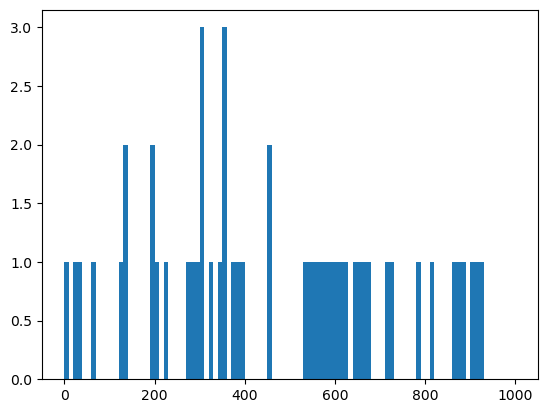

In [7]:
plt.hist(data["landmark_id"],100,range=(0,1000),label='test')

In [8]:
data['landmark_id'].between(60,90).sum()

1

(array([1., 2., 1., ..., 1., 1., 5.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

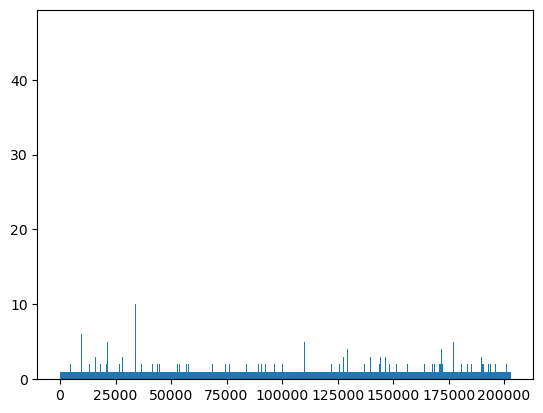

In [9]:
plt.hist(df['landmark_id'],bins=np.sort(df['landmark_id'].unique()))

In [10]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df['landmark_id'])

LabelEncoder()

In [11]:
df.tail()

,id,url,landmark_id
4131341,0069f71dc6c5dac0,http://upload.wikimedia.org/wikipedia/commons/...,51272
4131349,00f1aecb6c90b551,https://upload.wikimedia.org/wikipedia/commons...,63972
4131698,00de9755a042c271,https://upload.wikimedia.org/wikipedia/commons...,73064
4132109,009cb0761e9b3ce1,https://upload.wikimedia.org/wikipedia/commons...,68657
4132228,00061f402c08f27f,https://upload.wikimedia.org/wikipedia/commons...,193078


In [12]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [13]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [14]:
def get_image_from_number(num):
    fname, label = df.loc[num,:]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    img = cv2.imread(base_path,path)
    return img, label

Sample images from random classes


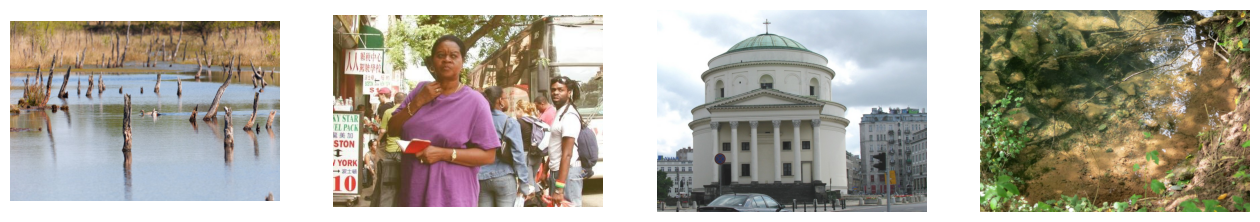

In [15]:
print("Sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path),k=3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_image = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_image))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis("off")
plt.show()

In [ ]:
!pip uninstall tensorflow
!pip uninstall keras


In [1]:
!pip install tensorflow
!pip install keras

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [5]:
from tensorflow.python.framework import _dtypes
from tensorflow.python import pywrap_tensorflow as _pywrap_tensorflow
import keras

from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle